# Spam Classification 

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv(r'spam.csv',encoding='latin')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3715,ham,Networking technical support associate.,NaN,NaN,NaN
5046,ham,Hmmm.still we dont have opener?,NaN,NaN,NaN
3567,ham,Sent me de webadres for geting salary slip,NaN,NaN,NaN
1133,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
505,ham,No it's waiting in e car dat's bored wat. Cos ...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Web App

# 1. Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample()

,v1,v2
4039,ham,I'm at home n ready...


In [11]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(4)

,target,text
1025,ham,I have a sore throat. It's scratches when I talk
5395,ham,Dunno lei shd b driving lor cos i go sch 1 hr ...
3579,ham,Have a lovely night and when you wake up to se...
3672,ham,Moji just informed me that you saved our lives...


In [12]:
#Labelencoding for target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
# ham - 0
# spam - 1

In [15]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [16]:
#mssing values
df.isnull().sum(
    
)

target    0
text      0
dtype: int64

In [17]:
#check for duplicates
df.duplicated().sum()

403

In [18]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.shape

(5169, 2)

# 2. EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

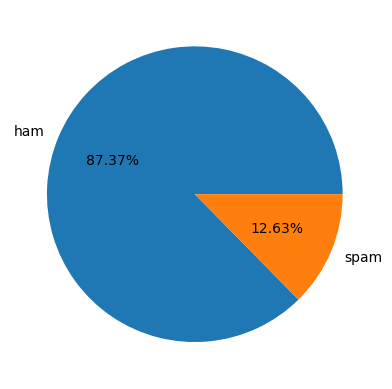

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

In [23]:
# Here data is imbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head(2)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [28]:
# number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [29]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#check for ham 
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#check for spam 
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

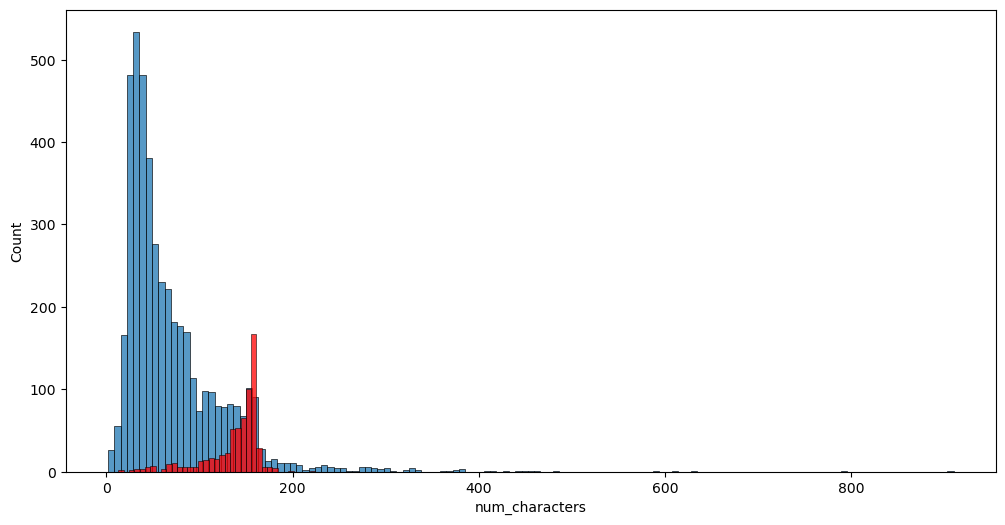

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

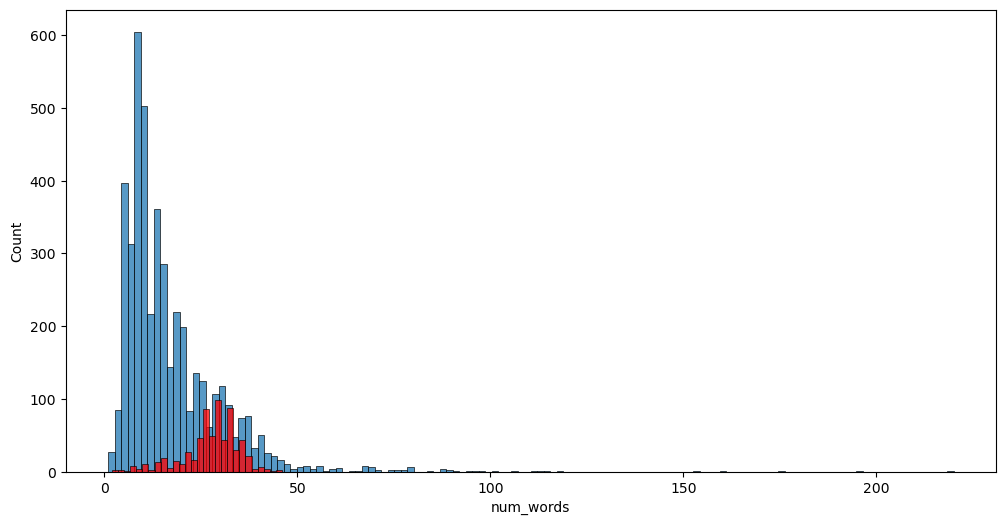

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

In [36]:
sns.pairplot(df,hue='target')

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df2=df.copy()

In [39]:
df2 = df2.drop(columns='text')

In [40]:
#sns.heatmap(df2.corr(),annot=True)

# 3 Data Preprocessing
- Lower case
- Tokenization
- Removing specal characters
- Removing stop words & punctuation
- stemming

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
     
    for i in text:
         y.append(ps.stem(i))
       
    return ' '.join(y)

In [45]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... ')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [47]:
df['transformed_text'] = df['text'].apply(transform_text)


In [48]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


# Wordcloud

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=300,min_font_size=10,background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

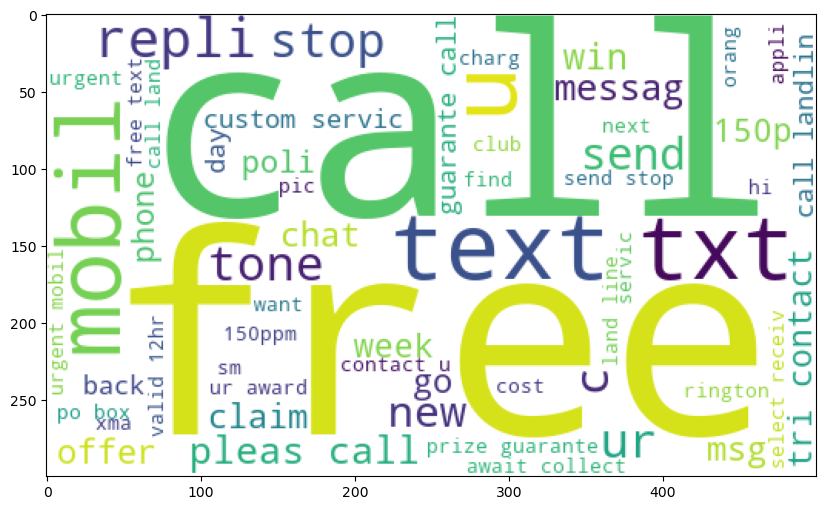

In [51]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

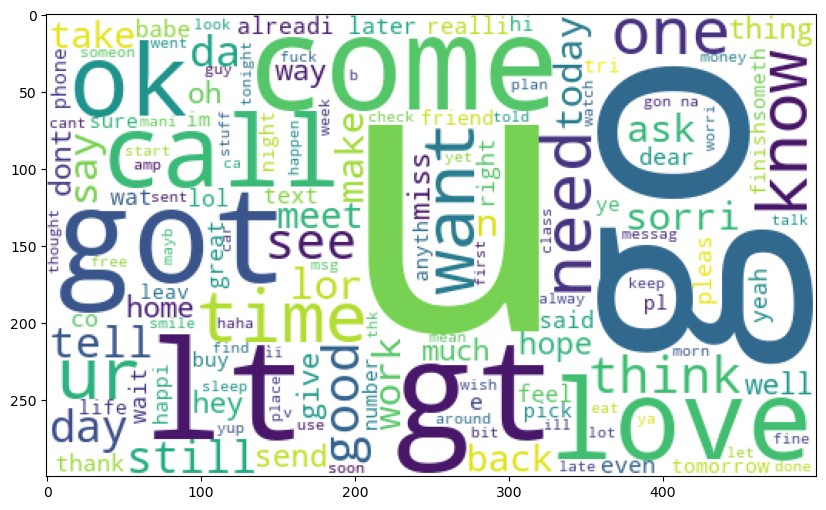

In [52]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [53]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [54]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

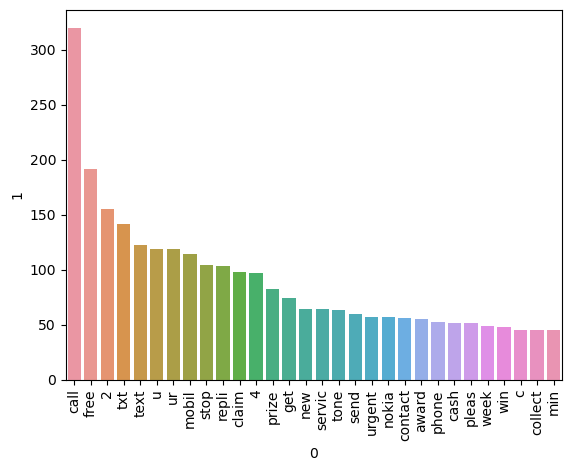

In [56]:
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

print(len(ham_corpus))


35404


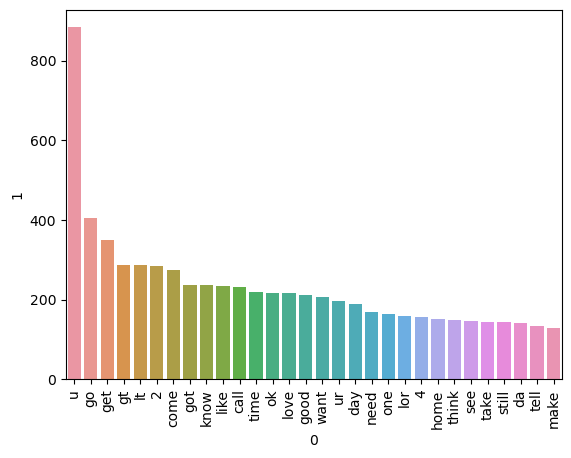

In [58]:
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [59]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [60]:
df.shape

(5169, 6)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) #improve max_features=3000

In [62]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X=scaler.fit_transform(X)

In [64]:
# appending the num_charcter col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [65]:
X.shape

(5169, 3000)

In [66]:
y = df['target'].values

In [67]:
from sklearn.model_selection import train_test_split

#X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[778 121]
 [ 24 111]]
0.47844827586206895


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[899   0]
 [ 40  95]]
1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491


In [73]:
# finally
# tfidf  --> mnb(not doing any mistake--- FP)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [76]:
classifiers = {
    'SVC':svc,
    'KNC':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BagC': bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb

}

In [77]:
def train_classifier(classifiers,X_train,X_test,y_train,y_test):
    classifiers.fit(X_train,y_train)
    y_pred = classifiers.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [78]:
#train_classifier(svc,X_train,X_test,y_train,y_test)

In [79]:
import numpy as np
accuracy_scores=[]
precision_scores=[]

for name,clf in classifiers.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)

    print('For ',name)
    print('Accuracy = ',current_accuracy)
    print('Precision = ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy =  0.9690522243713733
Precision =  0.9557522123893806
For  KNC
Accuracy =  0.9148936170212766
Precision =  1.0
For  NB
Accuracy =  0.9613152804642167
Precision =  1.0
For  DT
Accuracy =  0.9119922630560928
Precision =  0.7444444444444445
For  LR
Accuracy =  0.9410058027079303
Precision =  0.8854166666666666
For  RF
Accuracy =  0.9680851063829787
Precision =  1.0
For  AdaBoost
Accuracy =  0.9613152804642167
Precision =  0.9439252336448598
For  BagC
Accuracy =  0.9458413926499033
Precision =  0.8376068376068376
For  ETC
Accuracy =  0.9709864603481625
Precision =  0.981651376146789
For  GBDT
Accuracy =  0.9342359767891683
Precision =  0.8316831683168316
For  XGB
Accuracy =  0.9574468085106383
Precision =  0.9099099099099099


In [80]:
df_performance = pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy': accuracy_scores,'Precision': accuracy_scores}).sort_values('Precision',ascending=False)

In [81]:
df_performance

,Algorithm,Accuracy,Precision
8,ETC,0.970986,0.970986
0,SVC,0.969052,0.969052
5,RF,0.968085,0.968085
2,NB,0.961315,0.961315
6,AdaBoost,0.961315,0.961315
10,XGB,0.957447,0.957447
7,BagC,0.945841,0.945841
4,LR,0.941006,0.941006
9,GBDT,0.934236,0.934236
1,KNC,0.914894,0.914894


In [82]:
df_performance1 = pd.melt(df_performance, id_vars='Algorithm')

In [83]:
df_performance1

,Algorithm,variable,value
0,ETC,Accuracy,0.970986
1,SVC,Accuracy,0.969052
2,RF,Accuracy,0.968085
3,NB,Accuracy,0.961315
4,AdaBoost,Accuracy,0.961315
5,XGB,Accuracy,0.957447
6,BagC,Accuracy,0.945841
7,LR,Accuracy,0.941006
8,GBDT,Accuracy,0.934236
9,KNC,Accuracy,0.914894


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


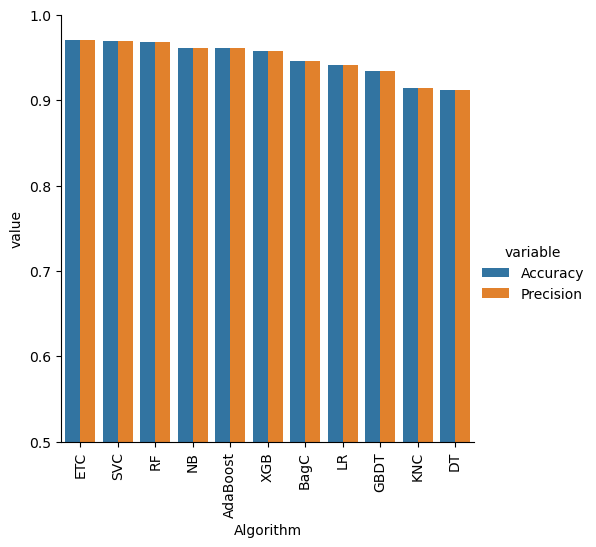

In [84]:
sns.catplot(x='Algorithm', y='value', hue='variable',data=df_performance1,
            kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
### model improve
## 1. Change the max_features parameter if Tfidf

In [86]:
#temp_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [87]:
df_performance.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,ETC,0.970986,0.970986,0.970986,0.981651
1,SVC,0.969052,0.969052,0.969052,0.955752
2,RF,0.968085,0.968085,0.968085,1.000000
3,NB,0.961315,0.961315,0.961315,1.000000
4,AdaBoost,0.961315,0.961315,0.961315,0.943925
5,XGB,0.957447,0.957447,0.957447,0.909910
6,BagC,0.945841,0.945841,0.945841,0.837607
7,LR,0.941006,0.941006,0.941006,0.885417
8,GBDT,0.934236,0.934236,0.934236,0.831683
9,KNC,0.914894,0.914894,0.914894,1.000000


In [88]:
#after scaling

#temp_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})
#new_df = df_performance.merge(temp_df,on='Algorithm')


#new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [89]:
#new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,ETC,0.970986,0.970986,0.970986,0.981651,0.970986,0.981651
1,SVC,0.969052,0.969052,0.969052,0.955752,0.969052,0.955752
2,RF,0.968085,0.968085,0.968085,1.000000,0.968085,1.000000
3,NB,0.961315,0.961315,0.961315,1.000000,0.961315,1.000000
4,AdaBoost,0.961315,0.961315,0.961315,0.943925,0.961315,0.943925
5,XGB,0.957447,0.957447,0.957447,0.909910,0.957447,0.909910
6,BagC,0.945841,0.945841,0.945841,0.837607,0.945841,0.837607
7,LR,0.941006,0.941006,0.941006,0.885417,0.941006,0.885417
8,GBDT,0.934236,0.934236,0.934236,0.831683,0.934236,0.831683
9,KNC,0.914894,0.914894,0.914894,1.000000,0.914894,1.000000


In [90]:
#Obersvation: after scaling the precision value is decreased but accuracy slightly increase

In [91]:
#after adding new feature


#temp_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_num_char':accuracy_scores,'Precision_num_char':precision_scores})
#new_df = df_performance.merge(temp_df,on='Algorithm')


#new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [92]:
# now if you talk in terms of NB,
    # the accuracy is decrease but precision is 1
    # but after adding max_feature=3000, chnages in NB is better as compare to other

In [93]:
# voting classifier
#svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
#mnb = MultinomialNB()
#etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [94]:
#voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [95]:
#voting.fit(X_train,y_train)

In [96]:
#y_pred = voting.predict(X_test)
#print('Accuracy',accuracy_score(y_test,y_pred))
#print('Precision',precision_score(y_test,y_pred))

In [97]:
#applying stacking

#estimators = [('svm',svc),('nb',mnb),('et',etc)]
#final_estimator = RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
#clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [100]:
#clf.fit(X_train,y_train)
#y_pred = clf.predict(X_test)
#print('Accuracy',accuracy_score(y_test,y_pred))
#print('Precision',precision_score(y_test,y_pred))

In [101]:
#after doing all the other methods to increase accuracy and precision
# we observe that there is no more change in accuracy
#Better is MultinomialNB


In [102]:
#1.text preprocess
#2.vectorize
#3.model apply

In [103]:
import pickle

In [104]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))